In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson  70-30.csv')

In [3]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-1.137388,1.814745,0.182859,-0.817762,0.174724,0.738038,-0.828922,0.519540,-1.710584,-0.419262,0.182855
1,-1.137388,0.296521,-0.858001,-0.523476,-0.397482,1.191365,0.797658,-0.604017,-0.018561,-0.174999,0.803333
2,0.879208,1.706301,0.349396,0.153383,0.823224,0.360266,-0.828922,1.193675,0.438742,-0.419262,0.803333
3,0.879208,0.188077,0.016321,0.153383,0.556195,-1.301933,-0.751466,-0.379306,0.347282,0.150684,0.803333
4,0.879208,-0.354146,-0.108582,-0.111475,-0.893393,0.284711,-0.828922,-0.379306,0.987506,-0.419262,-0.851276
...,...,...,...,...,...,...,...,...,...,...,...
573,0.879208,0.188077,4.073954,2.331102,-0.092305,1.342474,1.030026,1.193675,-0.567325,-0.052868,0.803333
574,0.879208,-2.523038,-0.025313,0.418241,-0.511923,-0.319725,-0.441641,0.070117,-0.018561,4.506698,1.134255
575,0.879208,0.188077,0.141224,-0.111475,-0.550070,-0.546388,1.030026,-0.379306,-0.933168,0.028553,1.010160
576,0.879208,-0.137257,1.140450,5.668544,-0.206746,-1.075270,-0.828922,-0.379306,-0.933168,-0.093578,0.803333


In [4]:
print(y_train['Class'].value_counts())

2    472
0     73
1     33
Name: Class, dtype: int64


# Backward Feature Elimination using Logistic Regression

In [5]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
# sfs1 = sfs1.fit(x_train, y_train)

In [6]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [7]:
BFE_Top_4_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c']]
BFE_Top_5_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
BFE_Top_7_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
BFE_Top_9_X = x_train[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
x_train = BFE_Top_7_X

In [8]:
BFE_Top_4_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c']]
BFE_Top_5_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
BFE_Top_7_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
BFE_Top_9_X = x_test[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL']]
x_test = BFE_Top_7_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.8951612903225806
[[ 16   0   7]
 [  1   0   6]
 [ 12   0 206]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.00      0.00      0.00         7
           2       0.94      0.94      0.94       218

    accuracy                           0.90       248
   macro avg       0.50      0.55      0.52       248
weighted avg       0.88      0.90      0.89       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8780202254153523
f1 Score  0.8858163317453197
Recall  0.8951612903225806
Specificity/TNR: 1.0
Cohen Kappa: 0.507598319969454
AUC Score  0.9217935162563067


C:\Users\babar\AppData\Local\Temp\ipykernel_2216\2519269152.py:21: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_2216\2519269152.py:29: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/float(TP+FP)
C:\Users\babar\AppData\Local\Temp\ipykernel_2216\2519269152.py:34: RuntimeWarning: invalid value encountered in true_divide
  MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\babar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8951612903225806,
  0.8780202254153523,
  0.8951612903225806,
  0.8858163317453197,
  0.507598319969454,
  0.9217935162563067]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([ 0.06588788,  0.03789327,  0.60602424,  0.05273573,  0.04726388,
         0.03022616,  0.04741664,  0.0433903 ,  0.06547823,  0.03141723,
         0.02626009,  0.03536518,  0.04437585,  0.02389374,  0.01812932,
         0.03644989,  0.04775889,  0.0242003 ,  0.02518322,  0.03743994,
         0.06391437,  0.0330878 ,  1.07192729,  0.05209067,  0.04237273,
         0.02645299,  0.04095356,  0.02925799,  0.04615681,  0.02974141,
         0.02334225,  0.04162383,  0.06710145,  0.0316103 ,  0.02616217,
         0.0497782 ,  0.0523267 ,  0.03313458,  0.03470988,  0.03763041,
         0.06790597,  0.04326739,  1.30999744,  0.05315785,  0.0494935 ,
         0.04046614,  0.06683111,  0.03653517,  0.0663394 ,  0.03899045,
         0.03024044,  0.04712415,  0.06430261,  0.04007752,  0.02765458,
         0.04417307,  0.05138855,  0.03689523,  0.03171623,  0.04352605,
         0.06631863,  0.03987014,  1.74329462,  0.04896374,  0.04043479,
         0.0281112 ,  0.04953113, 

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065888,0.007065,0.005387,0.001347,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.862069,0.862069,0.844828,0.948276,0.879310,0.894737,0.982456,0.894616,0.043859,21
1,0.037893,0.010585,0.003602,0.001523,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.913793,0.913793,0.844828,0.912281,0.894737,0.889322,0.038586,151
2,0.606024,0.100375,0.002897,0.000703,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.913793,0.896552,...,0.896552,0.827586,0.879310,0.931034,0.862069,0.824561,0.912281,0.875408,0.040150,191
3,0.052736,0.003783,0.003337,0.000720,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.810345,0.827586,...,0.706897,0.741379,0.793103,0.741379,0.793103,0.807018,0.701754,0.769843,0.042064,381
4,0.047264,0.004163,0.006931,0.007366,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.896552,0.844828,0.862069,0.913793,0.844828,0.912281,0.894737,0.884150,0.030683,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.044884,0.018738,0.003199,0.001058,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.844828,0.844828,...,0.810345,0.775862,0.827586,0.793103,0.810345,0.842105,0.894737,0.821960,0.034832,252
396,0.046284,0.006562,0.003947,0.001612,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,258
397,0.067163,0.015561,0.002585,0.000667,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.913793,0.913793,0.844828,0.912281,0.894737,0.891047,0.035260,48
398,0.023592,0.005202,0.002494,0.000804,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,258


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.894616
1,1,linear,0.889322
2,1,poly,0.875408
3,1,sigmoid,0.769843
4,1,rbf,0.884150
...,...,...,...
395,20,sigmoid,0.821960
396,20,rbf,0.816636
397,20,linear,0.891047
398,20,poly,0.816636


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9067453115547488
{'C': 8, 'gamma': 1, 'kernel': 'rbf'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        23
           1       0.80      0.57      0.67         7
           2       0.95      0.95      0.95       218

    accuracy                           0.90       248
   macro avg       0.76      0.68      0.71       248
weighted avg       0.90      0.90      0.90       248



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9020527859237536
f1 Score  0.9020842539401974
Recall  0.9032258064516129
Specificity/TNR: 0.9230769230769231
Cohen Kappa: 0.5414483821263483
AUC Score  0.9357106714297948


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9067453115547488,
  0.9020527859237536,
  0.9032258064516129,
  0.9020842539401974,
  0.5414483821263483,
  0.9357106714297948]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.894
Testing Accuracy: 0.899
[[ 16   1   6]
 [  2   0   5]
 [ 11   0 207]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.00      0.00      0.00         7
           2       0.95      0.95      0.95       218

    accuracy                           0.90       248
   macro avg       0.50      0.55      0.52       248
weighted avg       0.89      0.90      0.89       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.885845383759733
f1 Score  0.8917493796526055
Recall  0.8991935483870968
Specificity/TNR: 0.9411764705882353
Cohen Kappa: 0.5340447918232376
AUC Score  0.9410851921585685


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8951612903225806,
  0.8780202254153523,
  0.8951612903225806,
  0.8858163317453197,
  0.507598319969454,
  0.9217935162563067],
 'LR': [0.8991935483870968,
  0.885845383759733,
  0.8991935483870968,
  0.8917493796526055,
  0.5340447918232376,
  0.9410851921585685]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00799067, 0.02273045, 0.00443566, 0.01453483, 0.00588877,
        0.02114155, 0.00398798, 0.01675177, 0.00676889, 0.02623558,
        0.00494733, 0.016979  , 0.00723801, 0.02807388, 0.00475886,
        0.02495048, 0.00952411, 0.03160136, 0.00612326, 0.03879642,
        0.01581249, 0.03235972, 0.00656986, 0.02300787, 0.00851285,
        0.03194561, 0.00595646, 0.02404237, 0.00937505, 0.0303942 ,
        0.00598302, 0.0256099 , 0.00876064, 0.03494384, 0.00592351,
        0.02485063, 0.0093924 , 0.02882721, 0.00556622, 0.02653477]),
 'std_fit_time': array([0.00205396, 0.00379021, 0.00070594, 0.00134212, 0.00093905,
        0.00240357, 0.00063008, 0.00217338, 0.00060498, 0.00273046,
        0.00141361, 0.00230217, 0.00055488, 0.00346143, 0.00101368,
        0.00388691, 0.00100573, 0.00209729, 0.0006827 , 0.0154418 ,
        0.00770853, 0.00193853, 0.00182325, 0.00277078, 0.00086993,
        0.00659573, 0.00114902, 0.0011325 , 0.00224463, 0.00553949,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065888,0.007065,0.005387,0.001347,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.862069,0.862069,0.844828,0.948276,0.879310,0.894737,0.982456,0.894616,0.043859,21
1,0.037893,0.010585,0.003602,0.001523,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.913793,0.913793,0.844828,0.912281,0.894737,0.889322,0.038586,151
2,0.606024,0.100375,0.002897,0.000703,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.913793,0.896552,...,0.896552,0.827586,0.879310,0.931034,0.862069,0.824561,0.912281,0.875408,0.040150,191
3,0.052736,0.003783,0.003337,0.000720,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.810345,0.827586,...,0.706897,0.741379,0.793103,0.741379,0.793103,0.807018,0.701754,0.769843,0.042064,381
4,0.047264,0.004163,0.006931,0.007366,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.896552,0.931034,...,0.896552,0.844828,0.862069,0.913793,0.844828,0.912281,0.894737,0.884150,0.030683,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.044884,0.018738,0.003199,0.001058,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.844828,0.844828,...,0.810345,0.775862,0.827586,0.793103,0.810345,0.842105,0.894737,0.821960,0.034832,252
396,0.046284,0.006562,0.003947,0.001612,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,258
397,0.067163,0.015561,0.002585,0.000667,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.913793,0.931034,...,0.913793,0.844828,0.913793,0.913793,0.844828,0.912281,0.894737,0.891047,0.035260,48
398,0.023592,0.005202,0.002494,0.000804,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,258


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.894616
1,1,linear,0.889322
2,1,poly,0.875408
3,1,sigmoid,0.769843
4,1,rbf,0.884150
...,...,...,...
395,20,sigmoid,0.821960
396,20,rbf,0.816636
397,20,linear,0.891047
398,20,poly,0.816636


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8945251058681187
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.00      0.00      0.00         7
           2       0.95      0.95      0.95       218

    accuracy                           0.90       248
   macro avg       0.50      0.55      0.52       248
weighted avg       0.89      0.90      0.89       248



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.885845383759733
f1 Score  0.8917493796526055
Recall  0.8991935483870968
Specificity/TNR: 0.9411764705882353
Cohen Kappa: 0.5340447918232376
AUC Score  0.9464426411904098


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9067453115547488,
  0.9020527859237536,
  0.9032258064516129,
  0.9020842539401974,
  0.5414483821263483,
  0.9357106714297948],
 'LR': [0.8945251058681187,
  0.885845383759733,
  0.8991935483870968,
  0.8917493796526055,
  0.5340447918232376,
  0.9464426411904098]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8991935483870968
0.8991935483870968
[[ 15   1   7]
 [  1   3   3]
 [ 11   2 205]]
              precision    recall  f1-score   support

           0       0.56      0.65      0.60        23
           1       0.50      0.43      0.46         7
           2       0.95      0.94      0.95       218

    accuracy                           0.90       248
   macro avg       0.67      0.67      0.67       248
weighted avg       0.90      0.90      0.90       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9037832374760356
f1 Score  0.9010124699855014
Recall  0.8991935483870968
Specificity/TNR: 0.9375
Cohen Kappa: 0.556223606041085
AUC Score  0.8743505967435728


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.8951612903225806,
  0.8780202254153523,
  0.8951612903225806,
  0.8858163317453197,
  0.507598319969454,
  0.9217935162563067],
 'LR': [0.8991935483870968,
  0.885845383759733,
  0.8991935483870968,
  0.8917493796526055,
  0.5340447918232376,
  0.9410851921585685],
 'KNN': [0.8991935483870968,
  0.9037832374760356,
  0.8991935483870968,
  0.9010124699855014,
  0.556223606041085,
  0.8743505967435728]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01081295, 0.00945008, 0.00922737, 0.01781466, 0.01640511,
        0.0118314 , 0.01029603, 0.00966492, 0.01033142, 0.01065691,
        0.00931187, 0.0110425 , 0.0100493 , 0.01113067, 0.0111244 ,
        0.01294358, 0.01009295, 0.00762205, 0.00670481, 0.00800858,
        0.0095129 , 0.0103056 , 0.00951674, 0.01084249, 0.01155531,
        0.01241045, 0.01203969, 0.00737786, 0.0124753 , 0.00765662,
        0.00752907, 0.01013334, 0.00797927, 0.01055667, 0.01111686,
        0.00821056, 0.01188698, 0.00704727, 0.01024516, 0.00740428,
        0.00898321, 0.0122422 , 0.0079438 , 0.01049631, 0.00911503,
        0.00668271, 0.00729032, 0.0074373 , 0.00822952, 0.01099463,
        0.00713952, 0.00839775, 0.007197  , 0.00937476, 0.00875201,
        0.00861626, 0.00837252, 0.00897822, 0.00882666, 0.00843754,
        0.01160676, 0.00949788, 0.00740321, 0.0075702 , 0.01240101,
        0.01007087, 0.01044972, 0.00807786, 0.00758526, 0.00814602,
        0.01124973, 0.00820916,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010813,0.003115,0.014209,0.009696,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.931034,0.931034,...,0.844828,0.844828,0.896552,0.948276,0.810345,0.877193,0.964912,0.885935,0.054026,100
1,0.009450,0.004480,0.004279,0.000704,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.931034,0.931034,...,0.844828,0.844828,0.896552,0.948276,0.810345,0.877193,0.964912,0.885935,0.054026,100
2,0.009227,0.003402,0.013824,0.006531,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.913793,0.896552,...,0.844828,0.844828,0.896552,0.913793,0.879310,0.894737,0.912281,0.878978,0.037558,115
3,0.017815,0.012741,0.009533,0.009723,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.931034,0.931034,...,0.844828,0.844828,0.896552,0.948276,0.810345,0.877193,0.964912,0.885935,0.054026,100
4,0.016405,0.014962,0.015558,0.012307,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.931034,0.879310,...,0.862069,0.862069,0.844828,0.896552,0.896552,0.859649,0.912281,0.878917,0.027775,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.013084,0.007579,0.009608,0.006908,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.948276,0.965517,...,0.913793,0.931034,0.862069,0.948276,0.879310,0.912281,0.982456,0.922232,0.037959,6
116,0.015246,0.010399,0.011541,0.002973,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.931034,0.948276,...,0.896552,0.896552,0.844828,0.948276,0.879310,0.912281,0.947368,0.904930,0.037836,46
117,0.011016,0.005646,0.011721,0.007685,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.948276,0.965517,...,0.913793,0.931034,0.862069,0.965517,0.879310,0.912281,0.982456,0.923956,0.039465,5
118,0.015996,0.013197,0.017651,0.012040,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.931034,0.965517,...,0.896552,0.931034,0.844828,0.948276,0.862069,0.894737,0.947368,0.906624,0.042333,43


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.885935
1,minkowski,1,0.885935
2,minkowski,2,0.878978
3,minkowski,2,0.885935
4,minkowski,3,0.878917
...,...,...,...
115,manhattan,18,0.922232
116,manhattan,19,0.904930
117,manhattan,19,0.923956
118,manhattan,20,0.906624


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9257108287961282
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        23
           1       1.00      0.57      0.73         7
           2       0.96      0.95      0.96       218

    accuracy                           0.92       248
   macro avg       0.85      0.74      0.77       248
weighted avg       0.93      0.92      0.92       248



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9257586894163377
f1 Score  0.9205204435905215
Recall  0.9193548387096774
Specificity/TNR: 1.0
Cohen Kappa: 0.6339213226068344
AUC Score  0.94250020135064


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9067453115547488,
  0.9020527859237536,
  0.9032258064516129,
  0.9020842539401974,
  0.5414483821263483,
  0.9357106714297948],
 'LR': [0.8945251058681187,
  0.885845383759733,
  0.8991935483870968,
  0.8917493796526055,
  0.5340447918232376,
  0.9464426411904098],
 'KNN': [0.9257108287961282,
  0.9257586894163377,
  0.9193548387096774,
  0.9205204435905215,
  0.6339213226068344,
  0.94250020135064]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.895161,0.899194,0.899194
1,Precision,0.878020,0.885845,0.903783
2,Recall,0.895161,0.899194,0.899194
3,F1 Score,0.885816,0.891749,0.901012
4,Cohen Kappa,0.507598,0.534045,0.556224
5,AUC,0.921794,0.941085,0.874351


# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.906745,0.894525,0.925711
1,Precision,0.902053,0.885845,0.925759
2,Recall,0.903226,0.899194,0.919355
3,F1 Score,0.902084,0.891749,0.920520
4,Cohen Kappa,0.541448,0.534045,0.633921
5,AUC,0.935711,0.946443,0.942500


# Extracting Result

In [45]:
performance_df = performance_df.transpose()
performance_df.to_csv("Resulted CSV without YJ/With Yeo Johnson 70-30 Applying BFE Top 7 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("Resulted CSV without YJ/With Yeo Johnson 70-30 Applying Hyperparameter BFE Top 7 features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

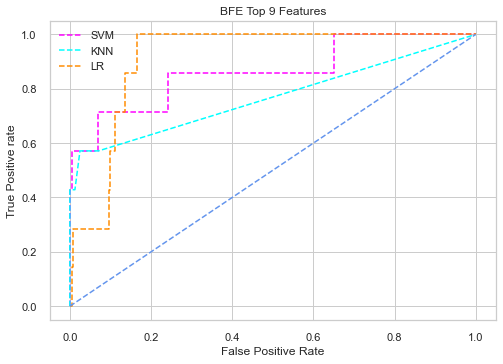

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 70-30 Applying BFE Top 7 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("Resulted ROC without YJ/Without Yeo Johnson 70-30 Applying BFE Top 7 Features.png", dpi=300)

plt.show();